In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("train.csv")

In [5]:
df = df[["Survived", "Age", "Fare"]]

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

C:\Users\psure\AppData\Local\Temp\ipykernel_17128\1809399462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [14]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [20]:
X_test.head()

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417


In [21]:
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [22]:
y_train.shape, y_test.shape

((712,), (179,))

In [23]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [24]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

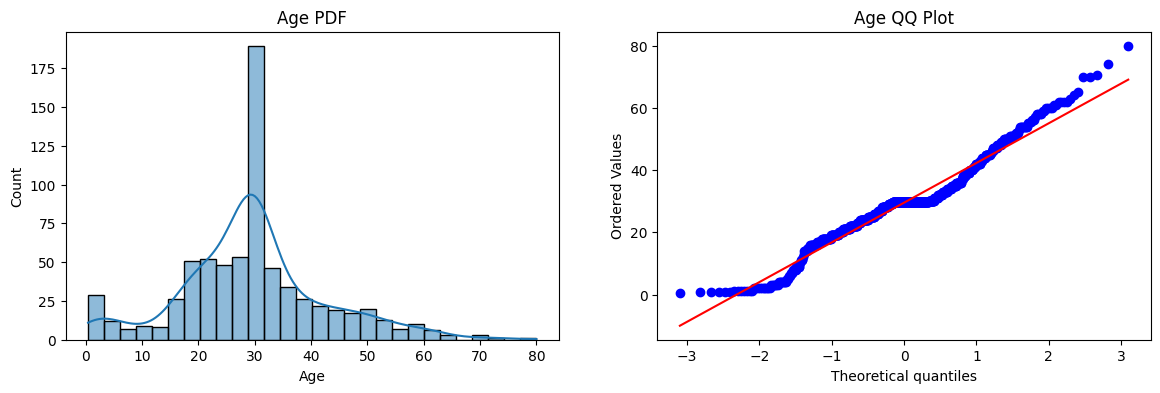

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train["Age"], kde = True)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist = "norm", plot = plt)
plt.title("Age QQ Plot")

plt.show()

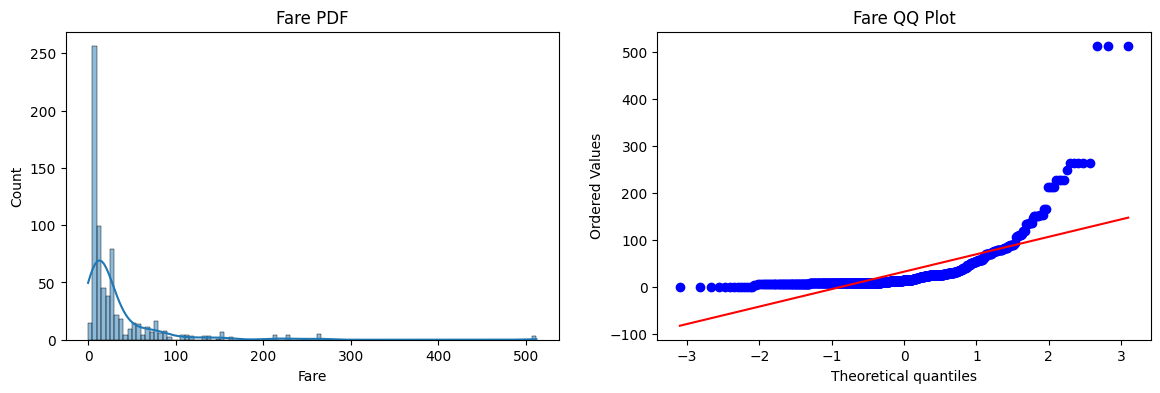

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train["Fare"], kde = True)
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"], dist = "norm", plot = plt)
plt.title("Fare QQ Plot")

plt.show()

In [34]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [35]:
clf.fit(X_train, y_train)
clf1.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print("Accuracy of LR", accuracy_score(y_test, y_pred))
print("Accuracy of DT", accuracy_score(y_test, y_pred1))

Accuracy of LR 0.6480446927374302
Accuracy of DT 0.664804469273743


In [36]:
trf = FunctionTransformer(func = np.log1p)

In [37]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [38]:
clf.fit(X_train_transformed, y_train)
clf1.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf1.predict(X_test_transformed)

print("Accuracy of LR", accuracy_score(y_test, y_pred))
print("Accuracy of DT", accuracy_score(y_test, y_pred1))

Accuracy of LR 0.6815642458100558
Accuracy of DT 0.6815642458100558


In [40]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring = "accuracy", cv = 10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring = "accuracy", cv = 10)))

LR 0.678027465667915
DT 0.6599750312109863


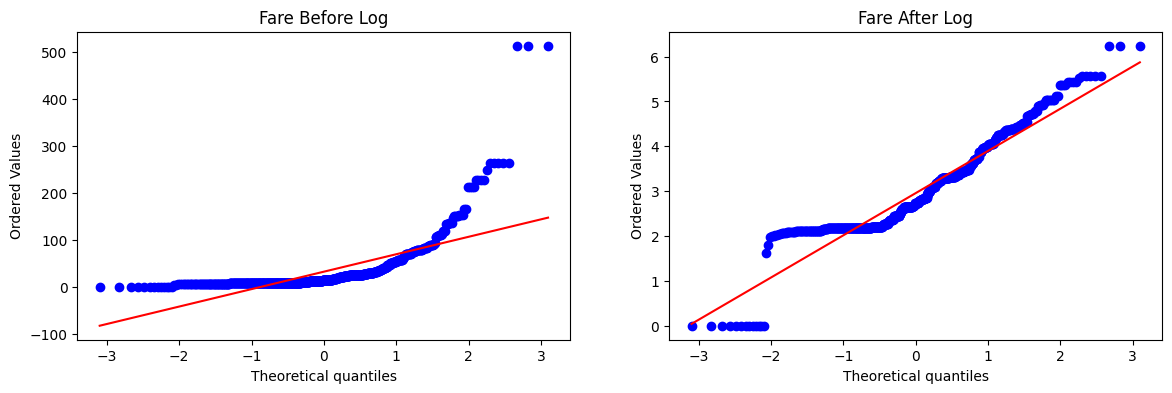

In [41]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

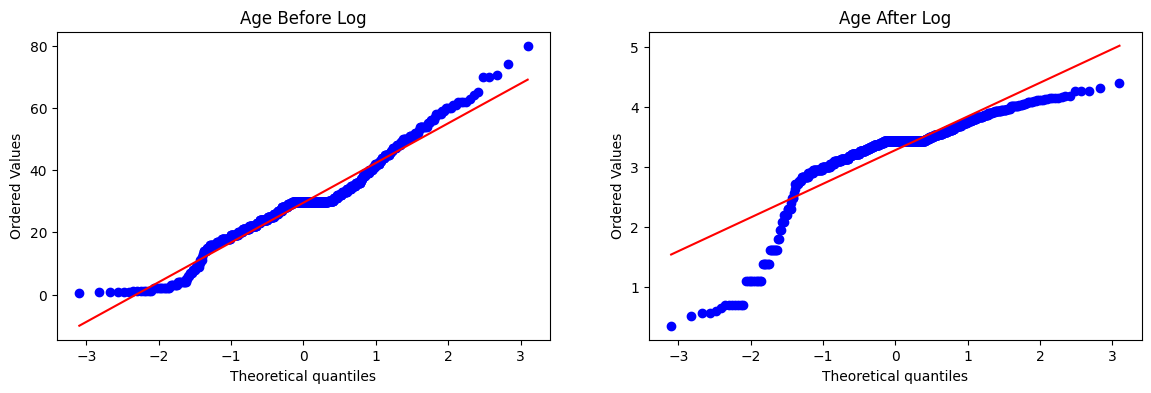

In [42]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [43]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [44]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [45]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6644319600499375


In [46]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


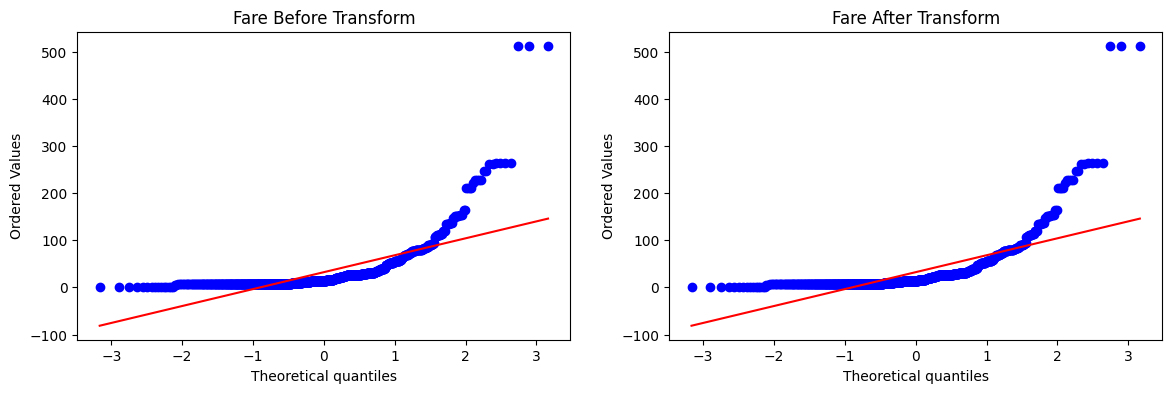

In [47]:
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


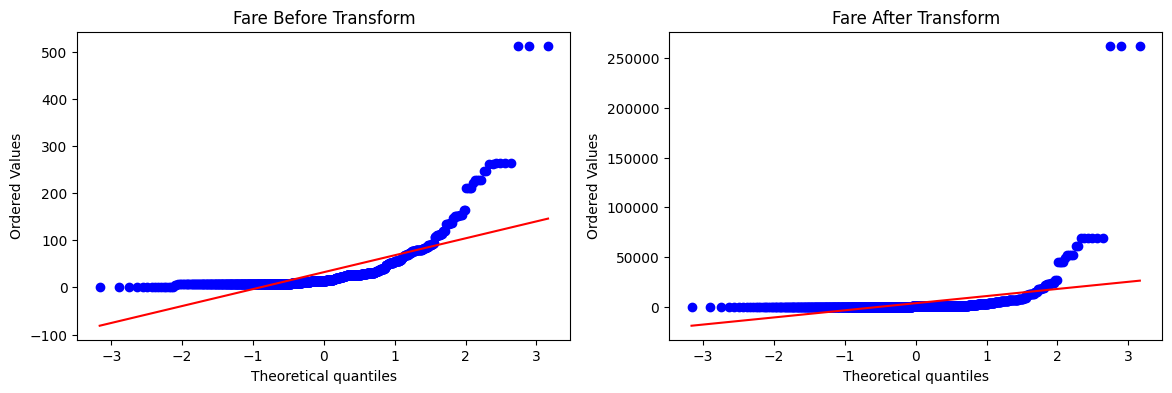

In [48]:
apply_transform(lambda x:x**2)

Accuracy 0.39843945068664166


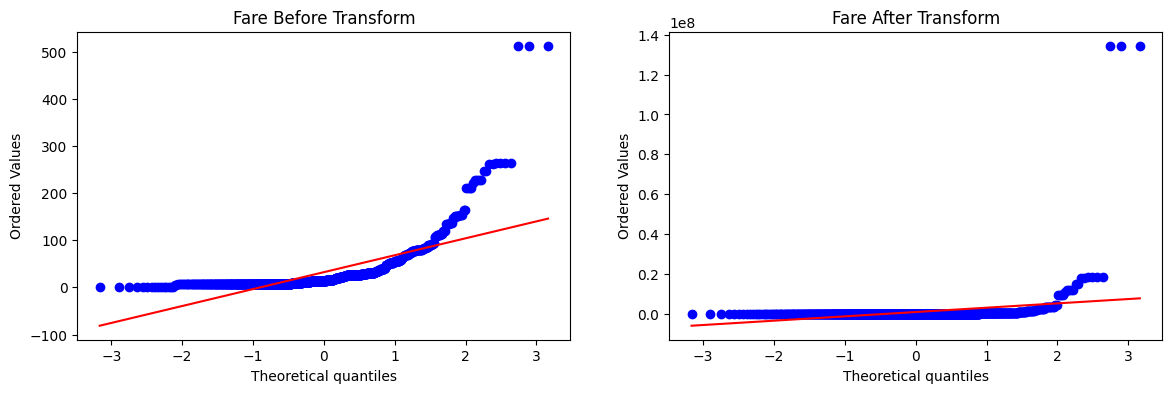

In [49]:
apply_transform(lambda x:x**3)

Accuracy 0.6589013732833957


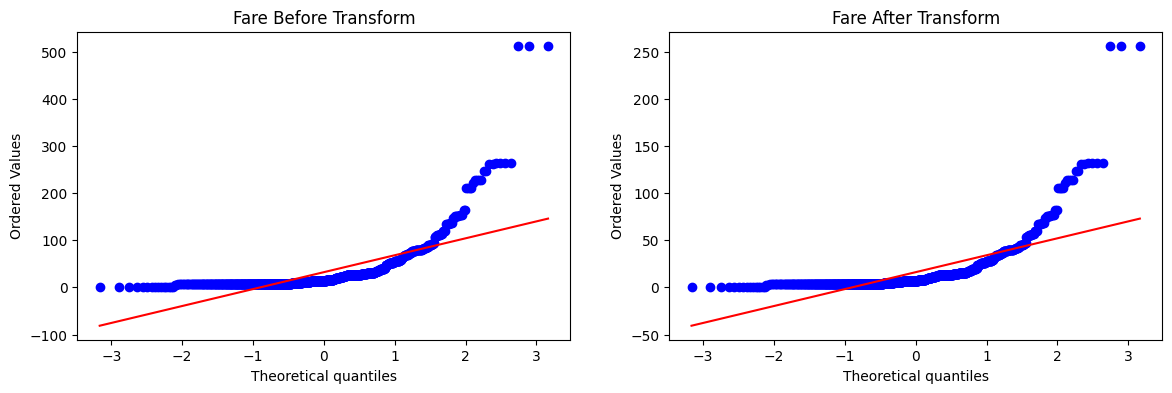

In [51]:
apply_transform(lambda x:x**1/2)

Accuracy 0.61729088639201


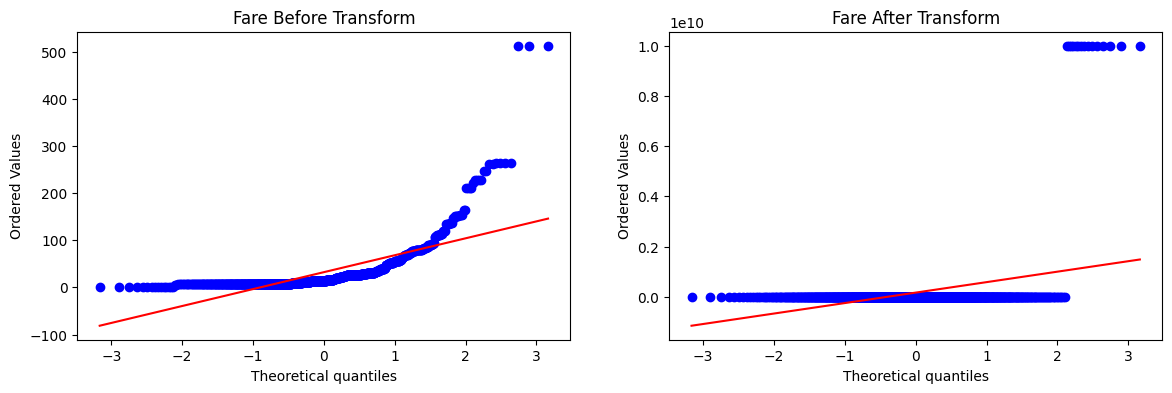

In [53]:
apply_transform(lambda x: 1/(x+0.0000000001))

Accuracy 0.6195131086142323


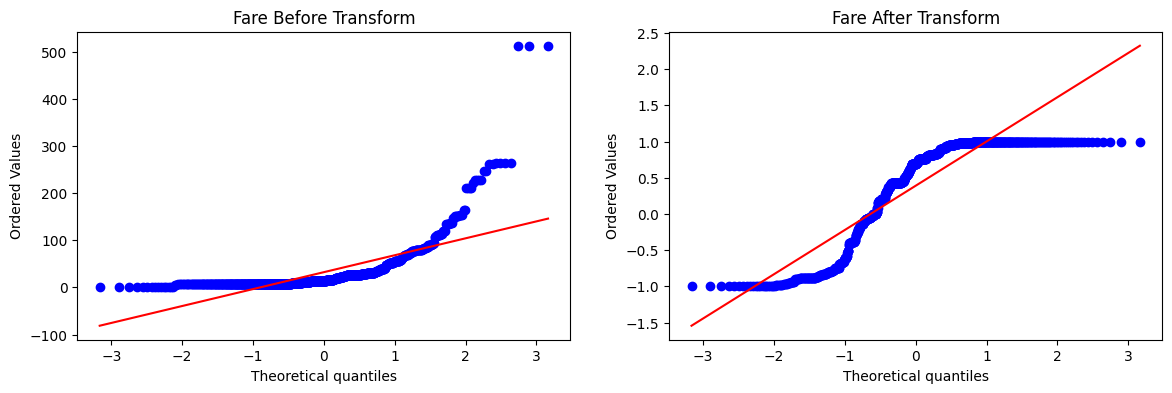

In [54]:
apply_transform(np.sin)